### Lauren Sussman & Madison Davis
https://lsussman1.github.io/DataScienceTutorial/

   The dataset we have begun looking at is the World Happiness Report. The World Happiness Report is a landmark survey of the state of global happiness ranging over 156 countries. The report includes data from the years 2015 to 2019 and includes correlated data about each country’s economic production, social support, life expectancy, freedom, absence of corruption, and generosity – factors that affect the quality of life. This data was collected from the Gallup World Poll, which asks participants to rate how close they are to their ideal possible life on a scale from 0 to 10. The report also includes a benchmark “dystopia” that has “the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support”(Sustainable Development Solutions Network). 
   Due to the current issues facing the world, we were intrigued by data that measures something positive. We plan to analyze how different events such as natural disasters and elections affect happiness as well as related measures such as the level of generosity and citizen's perception of corruption. We plan to answer questions such as “did any country experience a significant increase or decrease in happiness?” For example, it would be interesting to analyze the effects on the “Trust (Government Corruption)” score for America after Trump’s election in 2016. Other interesting events to look at might include natural disasters or the beginning or end of a war. We also plan to look at the relationship between wealth and happiness by comparing the “Economy (GDP per capita)” score to the “Happiness Score” per country. This may give some insight into the common discussion of “can money buy happiness?” With this question, we predict that money and happiness may be proportional until a certain threshold. Another factor that will likely affect this correlation is the distribution of wealth within a country, which might be available through another database. Another relevant question to ask would be comparing the happiness score with the rate of Coronavirus deaths per country, which is data we will likely be able to source. Rather than determining if Coronavirus deaths affected happiness score (which is not possible because there is no data yet for 2020), we could determine if national happiness played a role in how well countries dealt with the Coronavirus outbreak. Countries with happier people might have had an easier time convincing their citizens to stay home, social distance, and wear a mask, leading to lower death rates.
     
### Project Plan

   We plan to meet on Zoom each Thursday after class to review what tasks need to be completed before each Milestone deadline. We will make sure to leave each meeting with both partners understanding what they are responsible for completing before the next meeting. We set up a private Github repository to collaborate on code, and will communicate via text to stay updated on any roadblocks or bugs we are experiencing.
    
### References

Sustainable Development Solutions Network. “World Happiness Report.” Kaggle, 27 Nov. 2019, www.kaggle.com/unsdsn/world-happiness. 


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows = 8

#read in comma seperated files as dataframes
happiness2015 = pd.read_csv("./2015.csv")
happiness2016 = pd.read_csv("./2016.csv")
happiness2017 = pd.read_csv("./2017.csv")
happiness2018 = pd.read_csv("./2018.csv")
happiness2019 = pd.read_csv("./2019.csv")

#display 2015 data as a sample
#Reduce df to contain elements we will analyze
#Use uniform column names for all years
happiness2015.head()
h_2015 = happiness2015.loc[:,['Country','Region','Happiness Rank','Happiness Score','Economy (GDP per Capita)', 'Freedom','Trust (Government Corruption)', 'Generosity']]
h_2015.columns = ['Country','Region','Happiness Rank','Happiness Score','GDP','Freedom','Trust','Generosity']
h_2015.head()

,Country,Region,Happiness Rank,Happiness Score,GDP,Freedom,Trust,Generosity
0,Switzerland,Western Europe,1,7.587,1.39651,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2,7.561,1.30232,0.62877,0.14145,0.43630
2,Denmark,Western Europe,3,7.527,1.32548,0.64938,0.48357,0.34139
3,Norway,Western Europe,4,7.522,1.45900,0.66973,0.36503,0.34699
4,Canada,North America,5,7.427,1.32629,0.63297,0.32957,0.45811


In [31]:
happiness2016.head()
h_2016 = happiness2016.loc[:,['Country','Region','Happiness Rank','Happiness Score','Economy (GDP per Capita)', 'Freedom','Trust (Government Corruption)', 'Generosity']]
h_2016.columns = ['Country','Region','Happiness Rank','Happiness Score','GDP','Freedom','Trust','Generosity']
h_2016.head()

,Country,Region,Happiness Rank,Happiness Score,GDP,Freedom,Trust,Generosity
0,Denmark,Western Europe,1,7.526,1.44178,0.57941,0.44453,0.36171
1,Switzerland,Western Europe,2,7.509,1.52733,0.58557,0.41203,0.28083
2,Iceland,Western Europe,3,7.501,1.42666,0.56624,0.14975,0.47678
3,Norway,Western Europe,4,7.498,1.57744,0.59609,0.35776,0.37895
4,Finland,Western Europe,5,7.413,1.40598,0.57104,0.41004,0.25492


In [32]:
happiness2017.head()
h_2017 = happiness2017.loc[:,['Country','Happiness.Rank','Happiness.Score','Economy..GDP.per.Capita.', 'Freedom','Trust..Government.Corruption.', 'Generosity']]
h_2017.columns = ['Country','Happiness Rank','Happiness Score','GDP','Freedom','Trust','Generosity']
h_2017.head()

,Country,Happiness Rank,Happiness Score,GDP,Freedom,Trust,Generosity
0,Norway,1,7.537,1.616463,0.635423,0.315964,0.362012
1,Denmark,2,7.522,1.482383,0.626007,0.400770,0.355280
2,Iceland,3,7.504,1.480633,0.627163,0.153527,0.475540
3,Switzerland,4,7.494,1.564980,0.620071,0.367007,0.290549
4,Finland,5,7.469,1.443572,0.617951,0.382612,0.245483


In [33]:
happiness2018.head()
h_2018 = happiness2018.loc[:,['Country or region','Overall rank','Score','GDP per capita', 'Freedom to make life choices','Perceptions of corruption','Generosity']]
h_2018.columns = ['Country','Happiness Rank','Happiness Score','GDP','Freedom','Trust','Generosity']
h_2018.head()

,Country,Happiness Rank,Happiness Score,GDP,Freedom,Trust,Generosity
0,Finland,1,7.632,1.305,0.681,0.393,0.202
1,Norway,2,7.594,1.456,0.686,0.340,0.286
2,Denmark,3,7.555,1.351,0.683,0.408,0.284
3,Iceland,4,7.495,1.343,0.677,0.138,0.353
4,Switzerland,5,7.487,1.420,0.660,0.357,0.256


In [34]:
happiness2019.head()
h_2019 = happiness2019.loc[:,['Country or region','Overall rank','Score','GDP per capita', 'Freedom to make life choices','Perceptions of corruption','Generosity']]
h_2019.columns = ['Country','Happiness Rank','Happiness Score','GDP','Freedom','Trust','Generosity']
h_2019.head()

,Country,Happiness Rank,Happiness Score,GDP,Freedom,Trust,Generosity
0,Finland,1,7.769,1.340,0.596,0.393,0.153
1,Denmark,2,7.600,1.383,0.592,0.410,0.252
2,Norway,3,7.554,1.488,0.603,0.341,0.271
3,Iceland,4,7.494,1.380,0.591,0.118,0.354
4,Netherlands,5,7.488,1.396,0.557,0.298,0.322


In [35]:
#Add year to each dataframe
h_2015['Year'] = 2015
h_2016['Year'] = 2016
h_2017['Year'] = 2017
h_2018['Year'] = 2018
h_2019['Year'] = 2019

In [36]:
#create one df for all data
allyears = pd.concat([h_2015, h_2016, h_2017, h_2018, h_2019]).reset_index()
allyears.drop('index', axis=1, inplace=True)
allyears.head()

,Country,Region,Happiness Rank,Happiness Score,GDP,Freedom,Trust,Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,0.63297,0.32957,0.45811,2015


In [37]:
#Take care of missing regions
allyears['Region'] = allyears.groupby('Country').transform(lambda x: x.ffill().bfill())
allyears

,Country,Region,Happiness Rank,Happiness Score,GDP,Freedom,Trust,Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,0.66973,0.36503,0.34699,2015
...,...,...,...,...,...,...,...,...,...
778,Tanzania,Sub-Saharan Africa,153,3.231,0.47600,0.41700,0.14700,0.27600,2019
779,Afghanistan,Southern Asia,154,3.203,0.35000,0.00000,0.02500,0.15800,2019
780,Central African Republic,Sub-Saharan Africa,155,3.083,0.02600,0.22500,0.03500,0.23500,2019
781,South Sudan,Sub-Saharan Africa,156,2.853,0.30600,0.01000,0.09100,0.20200,2019


In [107]:
corr = allyears.corr()
corr

,Happiness Rank,Happiness Score,GDP,Freedom,Trust,Generosity,Year
Happiness Rank,1.000000,-0.992066,-0.794791,-0.537942,-0.372781,-0.117713,-0.007768
Happiness Score,-0.992066,1.000000,0.789284,0.551258,0.398418,0.137578,0.007065
GDP,-0.794791,0.789284,1.000000,0.340511,0.306307,-0.014560,0.019768
Freedom,-0.537942,0.551258,0.340511,1.000000,0.459593,0.290706,0.010353
Trust,-0.372781,0.398418,0.306307,0.459593,1.000000,0.318920,-0.122264
Generosity,-0.117713,0.137578,-0.014560,0.290706,0.318920,1.000000,-0.192587
Year,-0.007768,0.007065,0.019768,0.010353,-0.122264,-0.192587,1.000000


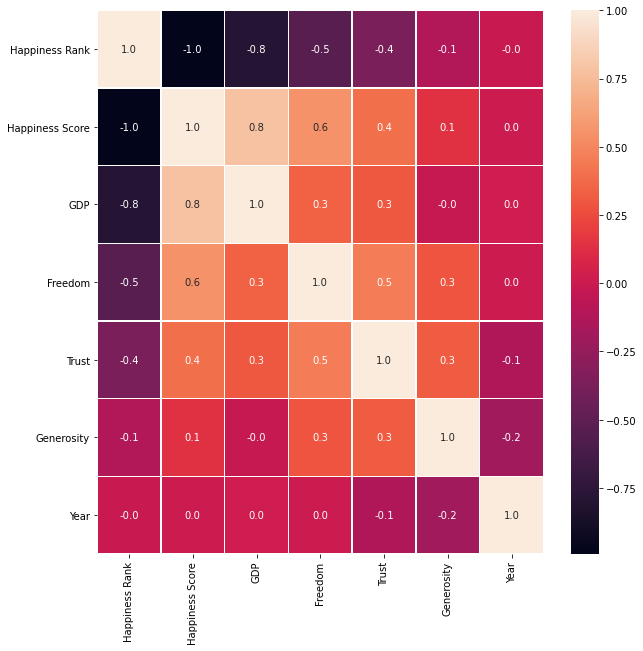

In [109]:
 # BY REGION: heat map of correlation of happiness and gdp ==> would indicate correlation.
import seaborn as sns
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, linewidths = .5, fmt='.1f', ax=ax)
plt.show()

In [154]:
corr1 = allyears.groupby('Region')['Happiness Score'].mean()
corr1.head()
joint = pd.crosstab(allyears.Region, allyears.GDP.mean(),normalize=True)
joint

col_0,0.916047
Region,
Australia and New Zealand,0.012920
Central and Eastern Europe,0.186047
Eastern Asia,0.036176
Latin America and Caribbean,0.140827
...,...
Southeastern Asia,0.056848
Southern Asia,0.045220
Sub-Saharan Africa,0.251938
Western Europe,0.133075


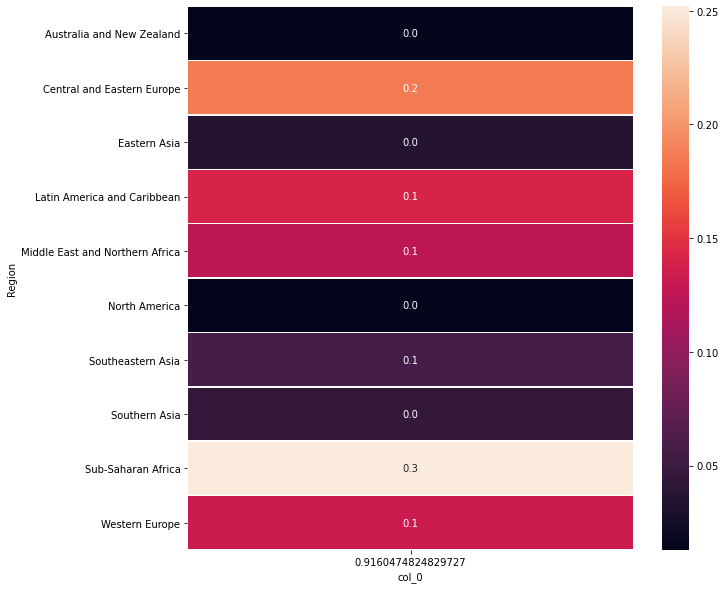

In [155]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(joint, annot=True, linewidths = .5, fmt='.1f', ax=ax)
plt.show()

In [139]:
corr1 = allyears.groupby('Region')['Happiness Score'].mean()
corr1.head()

Region
Australia and New Zealand          7.294600
Central and Eastern Europe         5.428875
Eastern Asia                       5.630464
Latin America and Caribbean        6.020725
Middle East and Northern Africa    5.337208
Name: Happiness Score, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

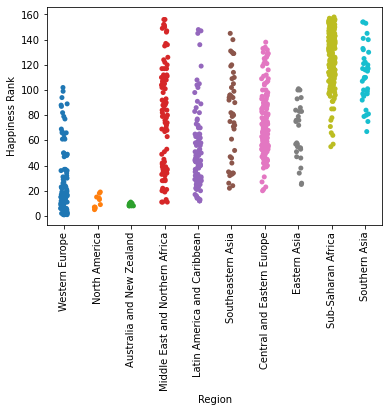

In [57]:
#Strip plot to visualize Happiness Rank per country by region
sns.stripplot(x="Region", y="Happiness Rank", data=allyears, jitter=True)
plt.xticks(rotation=90)

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

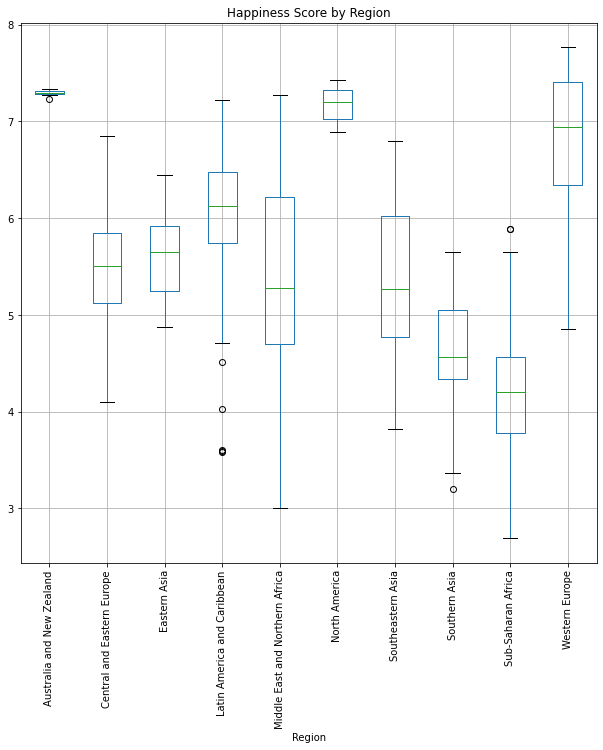

In [73]:
allyears.boxplot(column='Happiness Score',by='Region',rot=90,fontsize=10,figsize=(10,10))
plt.title("Happiness Score by Region")
plt.suptitle("")

In [82]:
#Locate the United States data over the years
us = allyears.loc[allyears.Country=='United States']

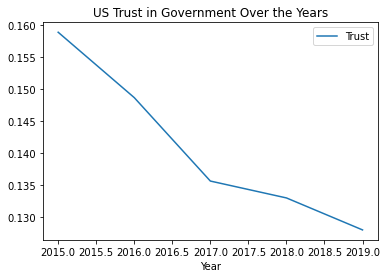

In [104]:
#Visualize Trust in United States Over the Years vs. Happiness Score
us.plot.line(x='Year',y='Trust',title='US Trust in Government Over the Years')

Text(0.5, 1.0, 'Happiness Score and GDP')

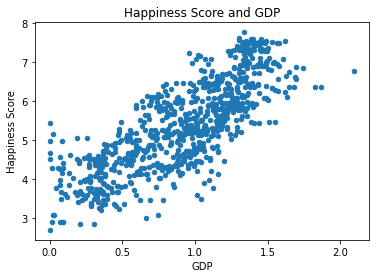

In [105]:
allyears.plot(kind = "scatter", x = "GDP", y = "Happiness Score")
plt.title("Happiness Score and GDP")